In [1]:
#Mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#Set repo path and check repo status

repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [2]:
#Initialize environment, load modules/libraries

import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import ensemble
from joblib import load

#Import python code from seperate files

sys.path.append('../')
from geomgen.helpers import show_grid_image

In [3]:
#Load images and labels from file (10000 images)

loaded  = np.load('../data/shapes_18.npz')
test_images = loaded['images']
test_labels = loaded['labels'][:,0].astype(int)

In [7]:
#Make the images pure black and white

threshold = 250
test_images[test_images > threshold] = 255
test_images[test_images <= threshold] = 0

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

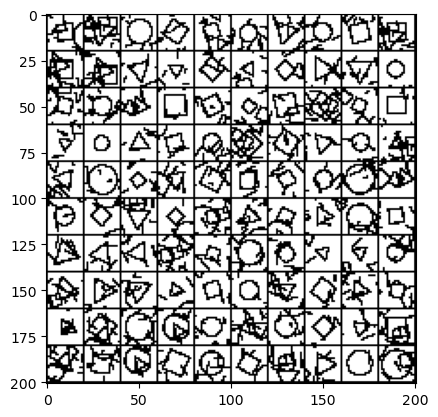

In [8]:
#Show a few images

grid = (10,10)
grid_pos = show_grid_image(test_images, grid,'../data/tmp_details.png')

In [9]:
#Compute model accuracy

rfc = ensemble.RandomForestClassifier(max_depth=22, n_estimators=70,min_samples_leaf=2)
rfc = load('../data/forest_m3.joblib')

print("test accuracy : %.3f" % (rfc.score(x_test, y_test)))

test accuracy : 0.943



position : target -> fail  (4=square, 3=triangle, 2=circle)
(0, 0) : 4 -> 3
(0, 1) : 2 -> 4
(0, 2) : 3 -> 4
(0, 3) : 2 -> 4
(0, 4) : 4 -> 3
(1, 0) : 3 -> 4
(1, 1) : 4 -> 3
(1, 2) : 4 -> 3
(1, 3) : 3 -> 4
(1, 4) : 2 -> 3
(2, 0) : 3 -> 4
(2, 1) : 4 -> 3
(2, 2) : 2 -> 4
(2, 3) : 4 -> 2
(2, 4) : 2 -> 4
(3, 0) : 2 -> 4
(3, 1) : 4 -> 3
(3, 2) : 2 -> 4
(3, 3) : 4 -> 3
(3, 4) : 4 -> 3


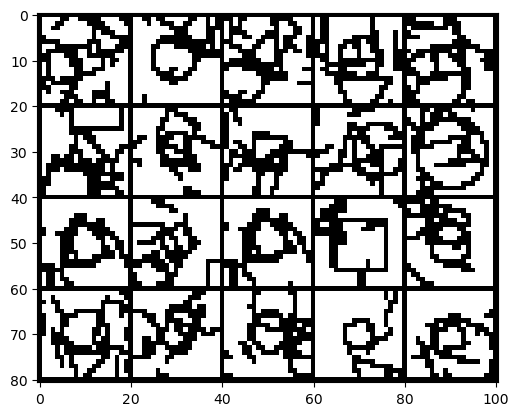

In [10]:
#Show a few images and labels where model prediction failed

pred_labels = rfc.predict(x_test)

fail = np.not_equal(pred_labels,y_test)
fail_images = test_images[fail]
target_labels = y_test[fail]
fail_labels = pred_labels[fail]

grid = (4,5)
grid_pos = show_grid_image(fail_images, grid, '../data/tmp_fails.png')

print("\nposition : target -> fail  (4=square, 3=triangle, 2=circle)")
for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {target_labels[i]} -> {fail_labels[i]}")